# 종합 에너지 데이터(신.재생에너지 생산량) EDA

### Hwang In Woo

## 목차 
0. 배경


1. 사전 준비


2. 변수 설명


3. 연도별 신.재생에너지 총 생산량


4. 2015년 지역별 신.재생에너지 총 생산량


5. 2016년 지역별 신.재생에너지 총 생산량 


6. 2017년 지역별 신.재생에너지 총 생산량 


7. 2018년 지역별 신.재생에너지 총 생산량 


8. 연도별 신.재생에너지 총 생산량 그래프 정리


9. 연도별 신.재생에너지 총 생산량 비율


10. EDA 결과        

## 0. 배경 
- 우리나라는 에너지 대외 의존도가 높고 유가변동에 의한 영향의 폭이 크고 깊어서 안정적 에너지수급이 중요한 과제로 대두되고 그 중요한 수단 발굴의 필요성이 인식하면서 1987년 12월에 ｢대체에너지개발촉진법｣을 제정․공포하고 1988년부터 본격적으로 기술개발을 지원하기 시작했다.


- 에너지전환은 발전믹스(Mix)의 변화를 넘어, 전체 에너지 믹스 최적화와 저효율 소비구조 개선, 에너지산업 육성 등을 포괄하는 에너지 전   반의 혁신을 의미한다. 전력생산 과정에서 시민의 참여와 이익을 권장하는 ‘에너지의 민주화’도 포함한다.

  우리나라는 ‘안전하고 깨끗한 에너지’를 통해 온실가스와 기후변화 등 지구의 환경 문제를 해결해 나가려는 세계적 흐름에 맞춰 에너지   전환을 추진하고 있다. 전통에너지원인 석탄과 원전 비중을 줄이고 친환경에너지원인 재생에너지 비중을 늘리고 있다.


- 우리나라는 에너지의 수입의존도가 높은 나라이며 총에너지의 공급비중중에서 90%이상을 차지하는 1차에너지(석유, 석탄 등의 에너지)의 가격 즉 유가변동이 예민해 안정적인 에너지 공급의 필요성이 있다. 또한 친환경의 중요성이 대두되면서 이를 대비할 신.재생에너지의 공급을 늘릴 필요가 있다. 따라서 현재까지 연도별 신.재생에너지의 발전량 및 지역별 발전량을 파악하여 회귀모델을 만들어 정부의 목표치와 회귀모델의 결과로 나온 예측치를 비교하여 정부의 정책 방향성에 문제가 없는 지 파악해보고 정책 달성을 위해 보완해야 할 점을 알아 보고자 한다.


- 제가 맡은 EDA에서는 신.재생에너지를 총합한 수치의 데이터프레임을 활용하여 연도별 추이와 지역별 현황을 확일 할 예정입니다.


## 1. 사전 준비

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import Image

In [6]:
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

## 2. 변수 설명
*2-1. 연도별 재.생산에너지 생산량

* 단위(toe) = 지구상에 존재하는 모든 에너지원의 발열량에 기초해서 이를 석유의 발열량으로 환산한 것으로 석유환산톤을 말한다. 각종 에너지의 단위를 비교하기 위한 가상단위라고 볼 수 있다. 1톤의 석유를 완전연소시킬때 얻을 수 있는 에너지량


- 총1차에너지(천toe) : 에너지원 중 천연자원 상태에서 공급되는 에너지(석유, 석탄, 천연가스 등)
- 신·재생에너지 공급비중(%) : 총 에너지에서 신에너지와 재생에너지의 공급비중을 합한 %비율
- 재생에너지(공급비중) : 총에너지에서 재생에너지의 공급비중 %비율
- 신에너지(공급비중) : 총에너지에서 신에너지의 공급비중 %비율
- 신·재생에너지 합계(toe) : 신에너지와 재생에너지 생란량 합계
- 재생에너지 : 재생에너지 생산량
- 신에너지: 신에너지 생산량



*2-2. 연도별 재.생산에너지 생산량


- 각 지역 : 대도시와 각 도별
- 신·재생에너지 합계(toe) : 각 지역별 신.재생에너지 생산량
- 재생에너지 : 각 지역별 재생에너지 생산량
- 신에너지 : 각 지역별 신에너지 생산량


## 3. 신.재생에너지 정책 목표

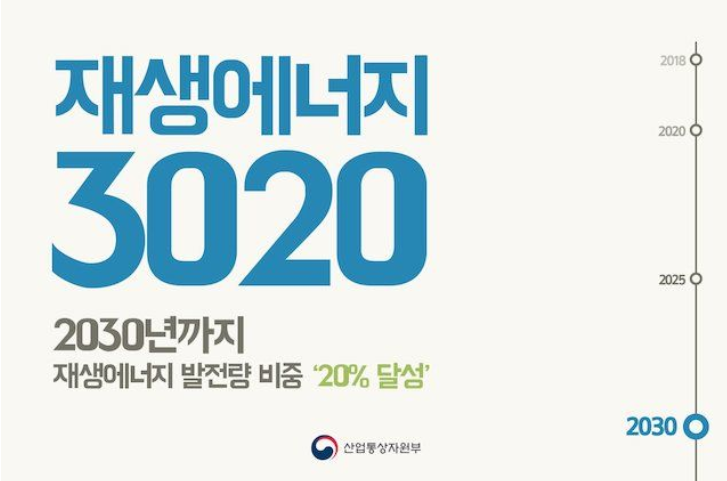

In [7]:
Image("정부목표.png")

### 정책 방향
- 2030년까지 재생에너지 발전량 비중을 20%로 끌어올리고 신규 발전설비 중 95% 이상을 태양광, 풍력과 같은 재생에너지로 공급하겠다는 것


- 또한 문재인 정부 '재생에너지 3020' 정책 핵심은 특히 주택·건물 등 자가용, 협동조합 등 소규모 사업, 농가 태양광 등 국민참여형 발전사업을 통해 신규 재생에너지 발전설비의 95% 이상을 태양광(63%), 풍력(34%) 중심의 청정에너지로 보급한다는 방침이다.

### 3. 연도별 신.재생에너지 총 생산량

#### 데이터 읽기

In [8]:
df = pd.read_csv('연도별 신.재생에너지 공급비중(%).csv')

In [9]:
df = df.iloc[:,1:]
df.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [10]:
df

,신·재생에너지 공급비중(%),재생에너지(공급비중),신에너지(공급비중)
2007,2.369792,2.369018,0.000774
2008,2.430966,2.429153,0.001812
2009,2.499486,2.491604,0.007882
2010,2.596831,2.580793,0.016039
2011,2.737519,2.714651,0.022868
2012,3.180001,3.150356,0.029645
2013,3.533045,3.489266,0.043779
2014,4.085137,4.014544,0.070592
2015,4.632801,4.552135,0.080666
2016,4.826232,4.718082,0.108150


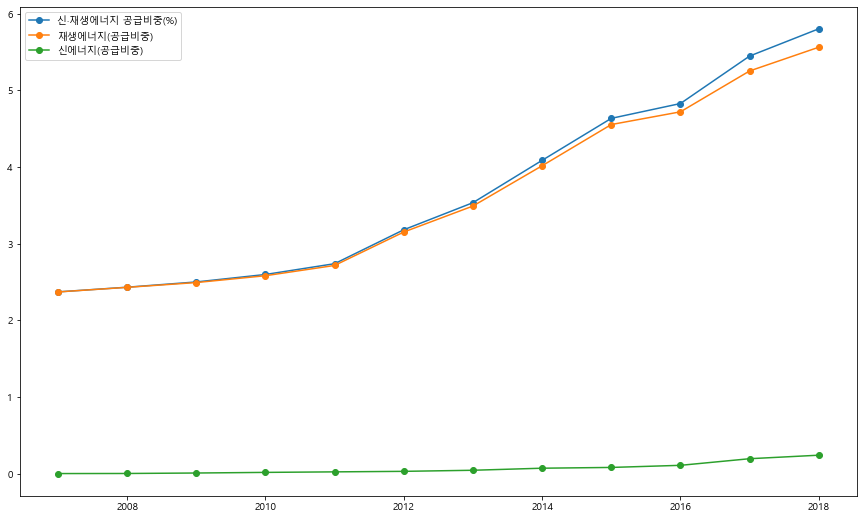

In [11]:
df.plot(figsize = (15, 9), marker = 'o')

- 신·재생에너지 공급비중에는 전체 합계에서 재생에너지가 대부분을 차지하고 신에너지는 아직 공급비중이 현저히 낮다는 것을 확인 할 수 있다. 


- 재생에너지의 공급비중은 11년 이후로 지속적으로 크게 증가중이다.

In [19]:
df1 = pd.read_csv('연도별 신.재생에너지 생산량.csv', index_col = 0 )

In [20]:
df1

,신·재생에너지 합계(toe),재생에너지,신에너지
2007,5.608776e+06,5.606944e+06,1832.000000
2008,5.858481e+06,5.854113e+06,4367.000000
2009,6.086249e+06,6.067056e+06,19193.000000
2010,6.856284e+06,6.813938e+06,42347.000000
2011,7.582845e+06,7.519502e+06,63344.000000
2012,8.850739e+06,8.768229e+06,82510.000000
2013,9.879207e+06,9.756791e+06,122416.000000
2014,1.153737e+07,1.133800e+07,199369.000000
2015,1.329299e+07,1.306153e+07,231458.000000
2016,1.417841e+07,1.386069e+07,317720.000000


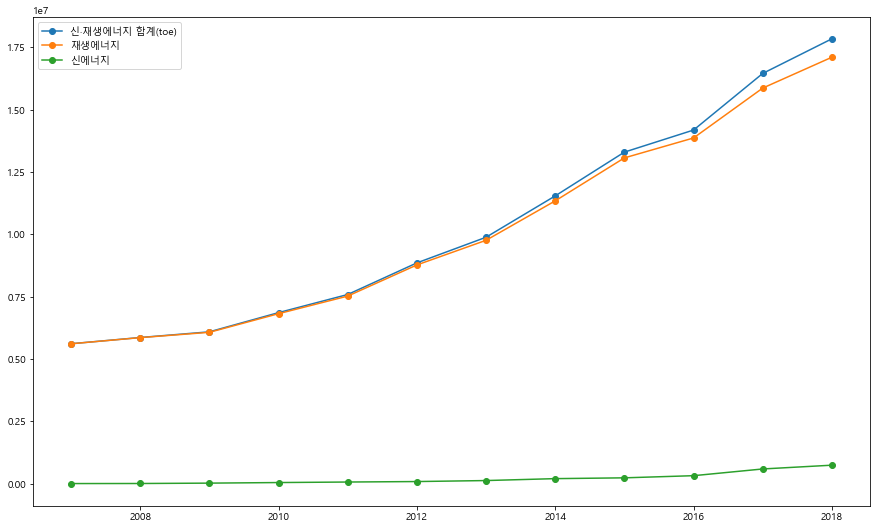

In [21]:
df1.plot(figsize = (15, 9), marker = 'o')

- 신·재생에너지 생산량에는 전체 합계에서 재생에너지가 대부분을 차지하고 신에너지는 아직 에너지생산량이 현저히 낮다는 것을 확인 할 수 있다. 


- 신.재생에너지의 생산량도 11녀 이후로 지속적으로 증가하는 추세

In [22]:
df2 = pd.read_csv('총1차에너지.csv', index_col = 0)

In [23]:
df2

,총1차에너지(천toe)
2007,236678
2008,240994
2009,243500
2010,264053
2011,276997
2012,278325
2013,279623
2014,282423
2015,286932
2016,293778


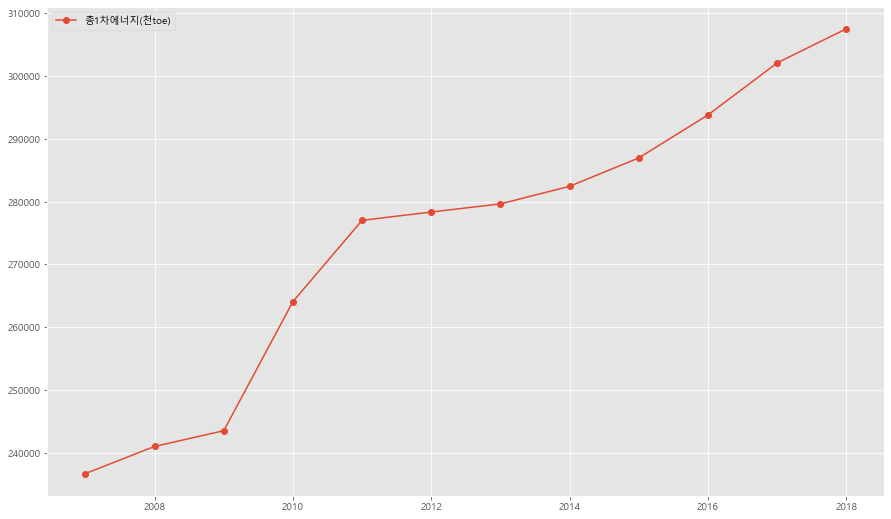

In [114]:
df2.plot(figsize = (15, 9), marker = 'o')

- 신에너지, 재생에너지를 뺀 1차 에너지들의 생산량 총 합은 2018년 까지 꾸준히 증가하는 추세이지만 11년까지 총 1차에너지의 생산량이 크게 증가하였다가 11년 이후로는 완만한 곡선으로 증가하고 있다.

#### 신.재생에너지 공급비중과 1차에너지 생산량 비교

### 결과
- 11년 이후 1차에너지의 생산량의 증가폭이 낮아지고 신.재생에너지 생산량의 증가폭이 높아진 것을 알 수 있다.

## 4. 2015 지역별 신.재생에너지 총 생산량

#### 기본통계

In [117]:
tf11 = pd.read_csv('2015년 지역별 신.재생에너지 총 생산량 기본통계.csv', index_col = 0)

In [118]:
tf11

,신·재생에너지 합계(toe),재생에너지,신에너지
count,1.700000e+01,1.700000e+01,17.000000
mean,7.819401e+05,7.683249e+05,13615.176471
std,8.187092e+05,8.120271e+05,31009.360154
min,5.787800e+04,5.787800e+04,0.000000
25%,1.825280e+05,1.728020e+05,44.000000
50%,5.551040e+05,5.525730e+05,3411.000000
75%,1.105802e+06,1.105758e+06,9726.000000
max,3.053159e+06,3.037676e+06,128009.000000


- 2015년 각 지역별 재셍에너지, 신에너지, 두개의 합에 대한 기본통계

In [119]:
tf = pd.read_csv('2015년 지역별 신.재생에너지 총 생산량.csv', index_col = 0)

In [120]:
tf

,신재생에너지_합계,재생에너지,신에너지
서울,335295,298327,36968
부산,145572,140254,5318
대구,182528,172802,9726
인천,628328,609803,18525
광주,67587,67065,522
대전,65131,65087,44
울산,694169,689305,4864
세종,57878,57878,0
경기,1409594,1281585,128009
강원,1105802,1105758,44


## 5. 2016년 지역별 신·재생에너지 총 생산량

#### 기본통계

In [125]:
af = pd.read_csv('2016년 신.재생에너지 기본통계.csv', index_col = 0)

In [126]:
af

,신·재생에너지 합계(toe),재생에너지,신에너지
count,1.700000e+01,1.700000e+01,17.000000
mean,8.340234e+05,8.153342e+05,18688.882353
std,8.371665e+05,8.239516e+05,34507.062067
min,7.021400e+04,6.966800e+04,0.000000
25%,1.818570e+05,1.709450e+05,50.000000
50%,5.683580e+05,5.683320e+05,2396.000000
75%,1.176786e+06,1.172800e+06,23849.000000
max,3.034387e+06,3.009489e+06,124763.000000


- 2016년 신.재생에너지 총 생산량 기본통계

In [127]:
af1 = pd.read_csv('2016년 신.재생에너지 생산량 합.csv', index_col = 0)

In [128]:
af1

,신재생에너지_합계,재생에너지,신에너지
서울,316805,278669,38136
부산,135771,129365,6406
대구,181857,170945,10911
인천,469248,445398,23849
광주,70214,69668,546
대전,86762,86698,64
울산,1176786,1172800,3986
세종,84701,84701,0
경기,1514250,1389487,124763
강원,902962,902919,42


## 6. 2017년 신.재생에너지 총 생산량 

#### 2017년 신.재생에너지 데이터프레임

In [135]:
sf1 = pd.read_csv('2017년 신.재생에너지 총 생산량.csv', index_col = 0)

In [136]:
sf1

,신재생에너지_합계,재생에너지,신에너지
서울,350880,281191,69688
부산,237438,198505,38933
대구,179156,170257,8899
인천,387825,362573,25252
광주,73199,72652,546
대전,113836,113750,85
울산,1343420,1338988,4432
세종,65440,65440,0
경기,1634363,1501521,132841
강원,1237809,1237768,41


#### 기본통계

In [133]:
sf = pd.read_csv('2017년 신.재생에너지 총 생산량 기본통계.csv', index_col = 0)

In [134]:
sf

,신·재생에너지 합계(toe),재생에너지,신에너지
count,1.700000e+01,1.700000e+01,17.000000
mean,7.819401e+05,7.683249e+05,13615.176471
std,8.187092e+05,8.120271e+05,31009.360154
min,5.787800e+04,5.787800e+04,0.000000
25%,1.825280e+05,1.728020e+05,44.000000
50%,5.551040e+05,5.525730e+05,3411.000000
75%,1.105802e+06,1.105758e+06,9726.000000
max,3.053159e+06,3.037676e+06,128009.000000


- 2018년 지역별 신.재생에너지 생산량 기본통계

## 7. 2018년 신.재생에너지 총 생산량

#### 2018년 신.재생에너지 데이터프레임

In [173]:
wf1 = pd.read_csv('2018년 신.재생에너지 생산량 합.csv', index_col = 0)

In [174]:
wf1

,신재생에너지_합계,재생에너지,신에너지
서울,381545,313114,68431
부산,259304,203601,55702
대구,189913,181005,8908
인천,412625,368351,44273
광주,79351,78804,547
대전,132408,132313,95
울산,1030337,1026750,3587
세종,76201,76198,3
경기,1821078,1670146,150931
강원,1386743,1386660,83


#### 기본통계

In [140]:
wf = pd.read_csv('2018년 지역별 신.재생에너지 총 생산량 기봉통계.csv', index_col = 0)

In [141]:
wf

,신·재생에너지 합계(toe),재생에너지,신에너지
count,1.700000e+01,1.700000e+01,17.000000
mean,1.049265e+06,1.005804e+06,43460.235294
std,1.010061e+06,9.767883e+05,94607.313064
min,7.620100e+04,7.619800e+04,0.000000
25%,2.593040e+05,2.036010e+05,95.000000
50%,7.536220e+05,7.534880e+05,2329.000000
75%,1.531690e+06,1.530831e+06,44273.000000
max,3.439727e+06,3.413708e+06,376851.000000


- 2018년 지역별 신.재생에너지 생산량 기본통계

## 8. 연도별 신.재생에너지 총 생산량 그래프 정리

### 2015년

Text(0.5, 1.0, '2015년 신.재생에너지 총 생산량')

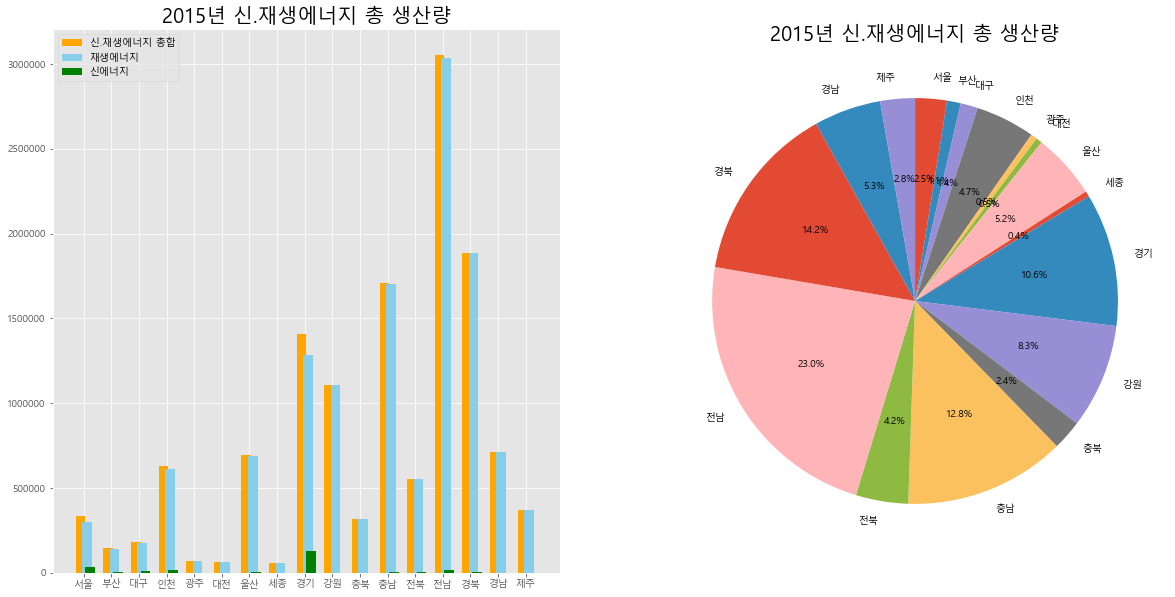

In [146]:
fig = plt.figure( figsize = ( 20, 10 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )
width = 0.35
labels = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
x= np.arange(len(labels))
ax1.bar( x -width/3 , tf.신재생에너지_합계,width, color = 'orange', label = '신.재생에너지 총합')
ax1.bar( x +width/3 , tf.재생에너지,width, color = 'skyblue',label = '재생에너지')
ax1.bar( x +2*width/3 , tf.신에너지,width, color = 'green',label = '신에너지')
ax2.pie(tf.신재생에너지_합계,labels = tf.index, autopct = '%.1f%%', startangle = 90, counterclock = False)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend( loc = 'best' )

ax1.set_title('2015년 신.재생에너지 총 생산량',size=20)
ax2.set_title('2015년 신.재생에너지 총 생산량',size=20)

In [148]:
# 신.재생에너지_합계 TOP 5
tf.sort_values(by='신재생에너지_합계' ,ascending=False).head()

,신재생에너지_합계,재생에너지,신에너지
전남,3053159,3037676,15483
경북,1888610,1885199,3411
충남,1707231,1701236,5995
경기,1409594,1281585,128009
강원,1105802,1105758,44


In [149]:
# 신.재생에너지_합계 BOTTOM 5
tf.sort_values(by='신재생에너지_합계' ,ascending=True).head()

,신재생에너지_합계,재생에너지,신에너지
세종,57878,57878,0
대전,65131,65087,44
광주,67587,67065,522
부산,145572,140254,5318
대구,182528,172802,9726


-> 2015년 지역별 신재생에너지 생산량이 높은 지역은 (전남, 경북, 충남)이고 상대적으로 (세종, 대전, 광주)가 낮은 지역으로 확인됨


-> 재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (경기, 서울, 전남) 순이다

### 2016년

Text(0.5, 1.0, '2016년 신.재생에너지 총 생산량')

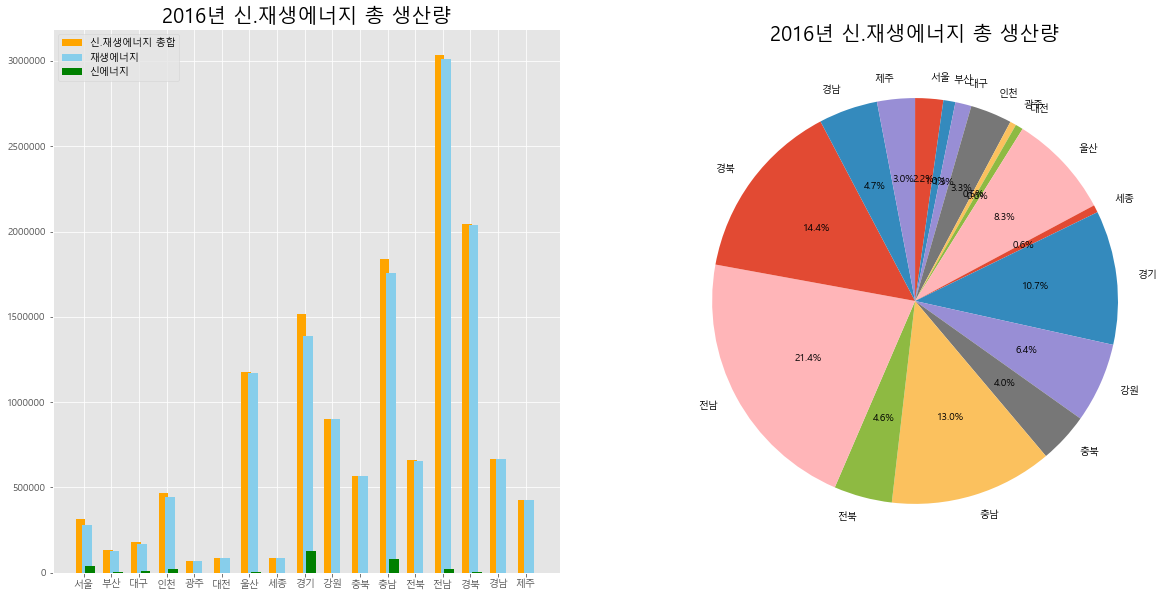

In [153]:
fig = plt.figure( figsize = ( 20, 10 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )
width = 0.35
labels = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
x= np.arange(len(labels))
ax1.bar( x -width/3 , af1.신재생에너지_합계,width, color = 'orange', label = '신.재생에너지 총합')
ax1.bar( x +width/3 , af1.재생에너지,width, color = 'skyblue',label = '재생에너지')
ax1.bar( x +2*width/3 , af1.신에너지,width, color = 'green',label = '신에너지')
ax2.pie(af1.신재생에너지_합계,labels = af1.index, autopct = '%.1f%%', startangle = 90, counterclock = False)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend( loc = 'best' )

ax1.set_title('2016년 신.재생에너지 총 생산량',size=20)
ax2.set_title('2016년 신.재생에너지 총 생산량',size=20)

In [154]:
# 신.재생에너지_합계 TOP 5
af1.sort_values(by='신재생에너지_합계' ,ascending=False).head()

,신재생에너지_합계,재생에너지,신에너지
전남,3034387,3009489,24897
경북,2043004,2040607,2396
충남,1840830,1759599,81231
경기,1514250,1389487,124763
울산,1176786,1172800,3986


In [155]:
# 신.재생에너지_합계 BOTTOM 5
af1.sort_values(by='신재생에너지_합계' ,ascending=True).head()

,신재생에너지_합계,재생에너지,신에너지
광주,70214,69668,546
세종,84701,84701,0
대전,86762,86698,64
부산,135771,129365,6406
대구,181857,170945,10911


-> 2016년 지역별 신재생에너지 생산량이 높은 지역은 16년과 같은(전남, 경북, 충남)이고 16년에 와서는 (광주, 세종, 대전)이 낮은 지역으로 확인됨


-> 재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (경기, 충남, 서울) 순이다. 충남이 서울과 전남을 제침

Text(0.5, 1.0, '2017년 신.재생에너지 총 생산량')

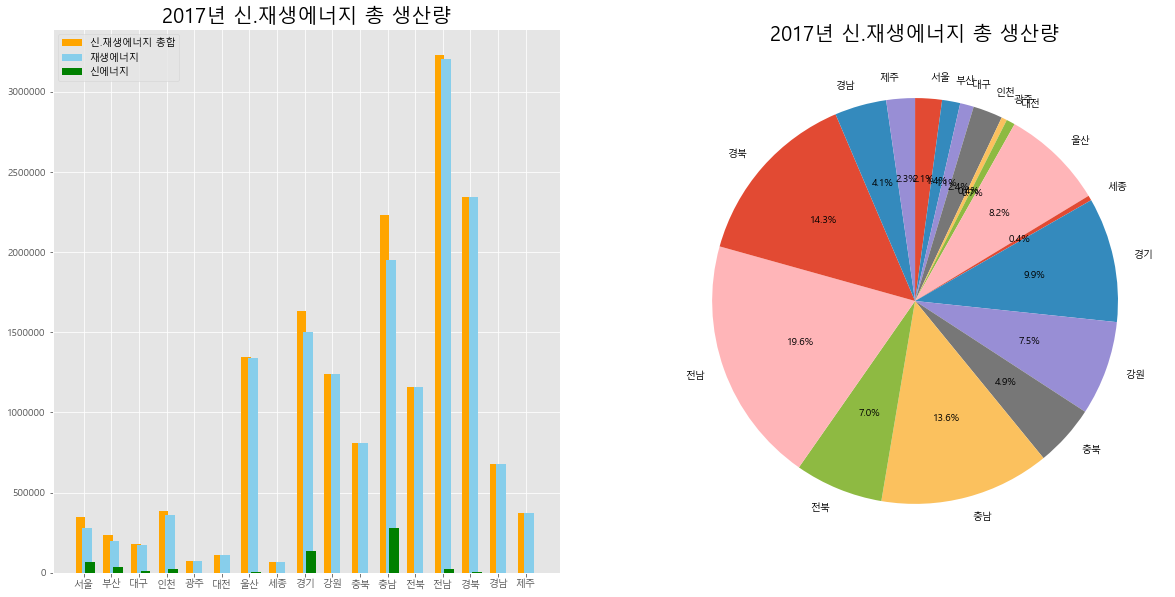

In [158]:
fig = plt.figure( figsize = ( 20, 10 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )
width = 0.35
labels = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
x= np.arange(len(labels))
ax1.bar( x -width/3 , sf1.신재생에너지_합계,width, color = 'orange', label = '신.재생에너지 총합')
ax1.bar( x +width/3 , sf1.재생에너지,width, color = 'skyblue',label = '재생에너지')
ax1.bar( x +2*width/3 , sf1.신에너지,width, color = 'green',label = '신에너지')
ax2.pie(sf1.신재생에너지_합계,labels = sf1.index, autopct = '%.1f%%', startangle = 90, counterclock = False)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend( loc = 'best' )

ax1.set_title('2017년 신.재생에너지 총 생산량',size=20)
ax2.set_title('2017년 신.재생에너지 총 생산량',size=20)

In [159]:
# 신.재생에너지_합계 TOP5
sf1.sort_values(by='신재생에너지_합계' ,ascending=False).head()

,신재생에너지_합계,재생에너지,신에너지
전남,3229555,3206708,22847
경북,2345137,2341743,3394
충남,2231253,1951391,279861
경기,1634363,1501521,132841
울산,1343420,1338988,4432


In [160]:
# 신.재생에너지_합계 BOTTOM 5
sf1.sort_values(by='신재생에너지_합계' ,ascending=True).head()

,신재생에너지_합계,재생에너지,신에너지
세종,65440,65440,0
광주,73199,72652,546
대전,113836,113750,85
대구,179156,170257,8899
부산,237438,198505,38933


-> 2017년 지역별 신재생에너지 생산량이 높은 지역은 작년과 같은(전남, 경북, 충남)이고 17년에 와서는 (세종, 광주, 대전)이 낮은 지역으로 확인됨


-> 재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (충남, 경기, 서울) 순이다. 충남의 신에너지 생산량이 급격히 증가

Text(0.5, 1.0, '2018년 신.재생에너지 총 생산량')

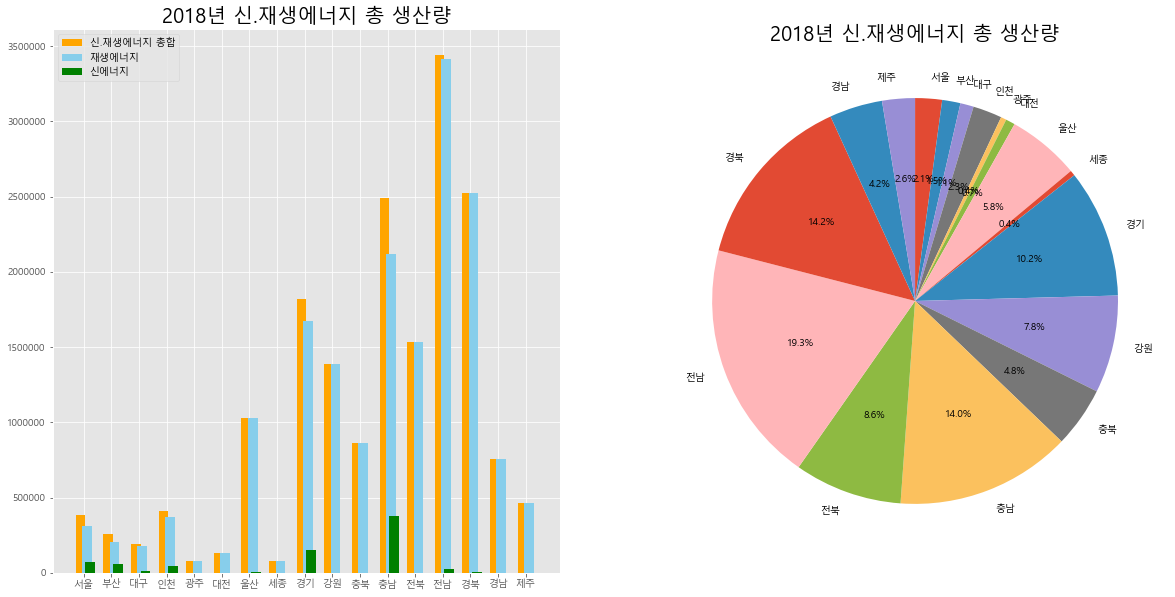

In [161]:
fig = plt.figure( figsize = ( 20, 10 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )
width = 0.35
labels = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
x= np.arange(len(labels))
ax1.bar( x -width/3 , wf1.신재생에너지_합계,width, color = 'orange', label = '신.재생에너지 총합')
ax1.bar( x +width/3 , wf1.재생에너지,width, color = 'skyblue',label = '재생에너지')
ax1.bar( x +2*width/3 , wf1.신에너지,width, color = 'green',label = '신에너지')
ax2.pie(wf1.신재생에너지_합계,labels = wf1.index, autopct = '%.1f%%', startangle = 90, counterclock = False)

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend( loc = 'best' )

ax1.set_title('2018년 신.재생에너지 총 생산량',size=20)
ax2.set_title('2018년 신.재생에너지 총 생산량',size=20)

In [162]:
# 신.재생에너지_합계 TOP5
wf1.sort_values(by='신재생에너지_합계' ,ascending=False).head()

,신재생에너지_합계,재생에너지,신에너지
전남,3439727,3413708,26019
경북,2524273,2521943,2329
충남,2493271,2116419,376851
경기,1821078,1670146,150931
전북,1531690,1530831,859


In [163]:
# 신.재생에너지_합계 BOTTOM5
wf1.sort_values(by='신재생에너지_합계' ,ascending=True).head()

,신재생에너지_합계,재생에너지,신에너지
세종,76201,76198,3
광주,79351,78804,547
대전,132408,132313,95
대구,189913,181005,8908
부산,259304,203601,55702


-> 2018년 지역별 신재생에너지 생산량이 높은 지역은 작년과 같은(전남, 경북, 충남)이고 18년에 와서는 (세종, 광주, 대전)이 낮은 지역으로 확인됨


-> 재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (충남, 경기, 서울) 순이다. 작년과 비교하여 변동 없음

## 9. 연도별 신.재생에너지 총 생산량 비율

In [169]:
tf6 = pd.read_csv('2015년 신.재생에너지 생산량 비율.csv', index_col = 0)
af6 = pd.read_csv('2016년 신.재생에너지 생산량 비율.csv', index_col = 0)
sf6 = pd.read_csv('2017년 신.재생에너지 생산량 비율.csv', index_col = 0)
wf6 = pd.read_csv('2018년 신.재생에너지 생산량 비율.csv', index_col = 0)

In [171]:
tft6 = tf6.drop(['신·재생에너지 합계'])
aft6 = af6.drop(['신·재생에너지 합계'])
sft6 = sf6.drop(['신·재생에너지 합계'])
wft6 = wf6.drop(['신·재생에너지 합계'])

Text(0.5, 1.0, '2018년 신.재생에너지 총 생산량')

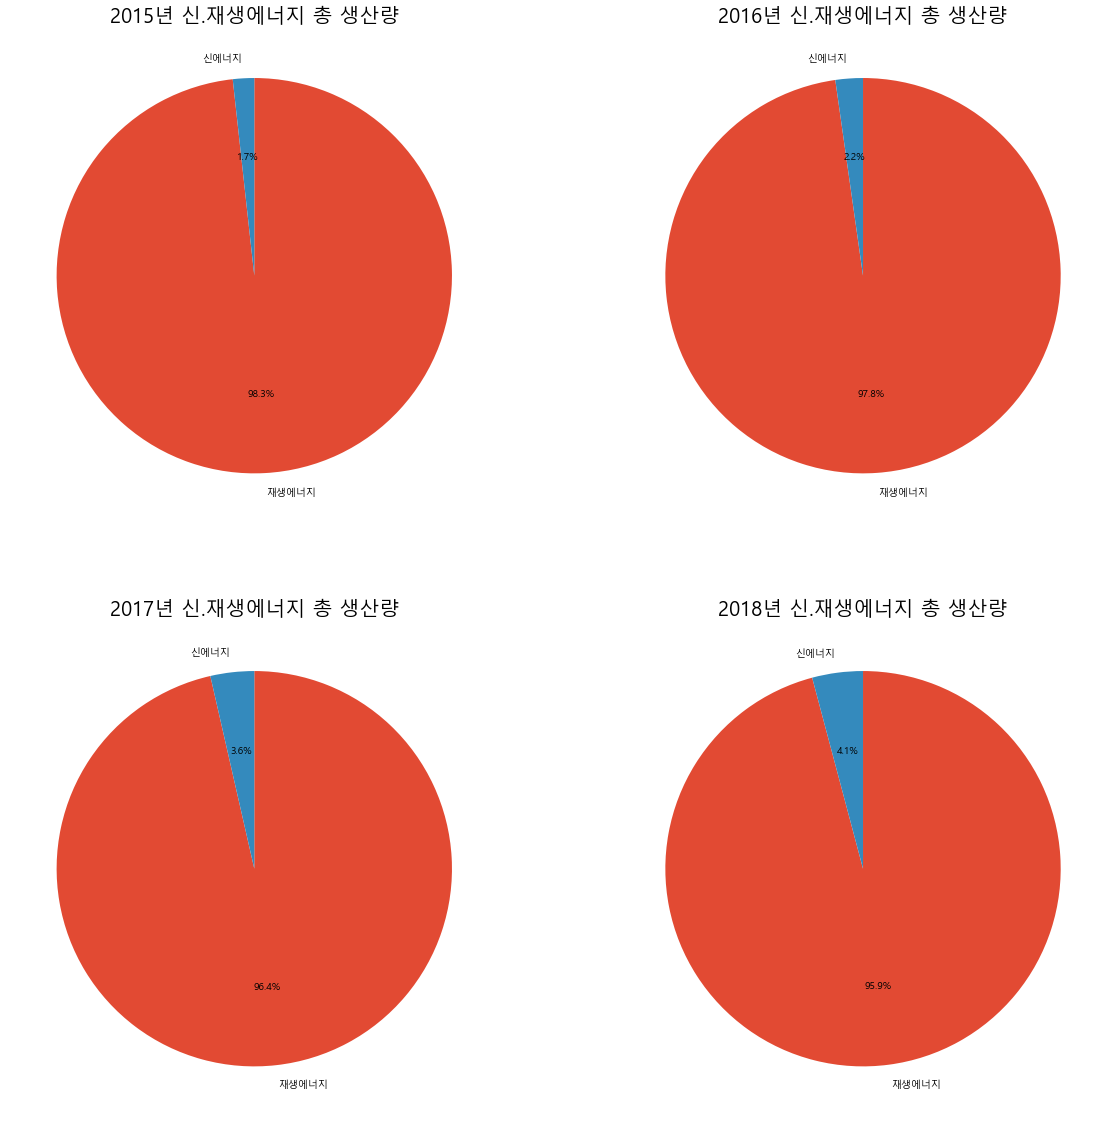

In [176]:
fig = plt.figure( figsize = ( 20, 20) )   
ax1 = fig.add_subplot( 2, 2, 1 )
ax2 = fig.add_subplot( 2, 2, 2 )
ax3 = fig.add_subplot( 2, 2, 3 )
ax4 = fig.add_subplot( 2, 2, 4 )
width = 0.35
labels = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
x= np.arange(len(labels))
ax1.pie(tft6.전국,labels = tft6.index, autopct = '%.1f%%', startangle = 90, counterclock = False)
ax2.pie(aft6.전국,labels = aft6.index, autopct = '%.1f%%', startangle = 90, counterclock = False)
ax3.pie(sft6.전국,labels = sft6.index, autopct = '%.1f%%', startangle = 90, counterclock = False)
ax4.pie(wft6.전국,labels = wft6.index, autopct = '%.1f%%', startangle = 90, counterclock = False)



ax1.set_title('2015년 신.재생에너지 총 생산량',size=20)
ax2.set_title('2016년 신.재생에너지 총 생산량',size=20)
ax3.set_title('2017년 신.재생에너지 총 생산량',size=20)
ax4.set_title('2018년 신.재생에너지 총 생산량',size=20)

- 15년 ~ 18년, 4년의 기간동안 신.재생에너지 총합에서 신에너지의 비율이 1.7%에서 4.1%로 지속적으로 상승중이라는 것을 확인하였다.

## 10. EDA 결과

1. 2015년 지역별 신재생에너지 생산량이 높은 지역은 (전남, 경북, 충남)이고 상대적으로 (세종, 대전, 광주)가 낮은 지역으로 확인됨,

   재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (경기, 서울, 전남) 순이다


2. 2016년 지역별 신재생에너지 생산량이 높은 지역은 16년과 같은(전남, 경북, 충남)이고 16년에 와서는 (광주, 세종, 대전)이 낮은 지역으로 확인됨,

   재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (경기, 충남, 서울) 순이다. 충남이 서울과 전남을 제침
 

3. 2017년 지역별 신재생에너지 생산량이 높은 지역은 작년과 같은(전남, 경북, 충남)이고 17년에 와서는 (세종, 광주, 대전)이 낮은 지역으로 확인됨,

   재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (충남, 경기, 서울) 순이다. 충남의 신에너지 생산량이 급격히 증가


4. 2018년 지역별 신재생에너지 생산량이 높은 지역은 작년과 같은(전남, 경북, 충남)이고 18년에 와서는 (세종, 광주, 대전)이 낮은 지역으로 확인됨,

   재생에너지는 신재생에너지 생산량의 추세와 비슷하고 신에너지 생산량은 (충남, 경기, 서울) 순이다. 작년과 비교하여 변동 없음


5. 15년 ~ 18년, 4년의 기간동안 신.재생에너지 총합에서 신에너지의 비율이 1.7%에서 4.1%로 지속적으로 상승중이라는 것을 확인하였다.


6. 신·재생에너지 공급비중에는 전체 합계에서 재생에너지가 대부분을 차지하고 신에너지는 아직 공급비중이 현저히 낮다는 것을 확인 할 수 있다. 
   재생에너지의 공급비중은 11년 이후로 지속적으로 크게 증가중이다.


7. 신·재생에너지 생산량에는 전체 합계에서 재생에너지가 대부분을 차지하고 신에너지는 아직 에너지생산량이 현저히 낮다는 것을 확인 할 수 있다. 
   신.재생에너지의 생산량도 11녀 이후로 지속적으로 증가하는 추세


8. 신에너지, 재생에너지를 뺀 1차 에너지들의 생산량 총 합은 2018년 까지 꾸준히 증가하는 추세이지만 11년까지 총 1차에너지의 생산량이    크게 증가하였다가 11년 이후로는 완만한 곡선으로 증가하고 있다.


9. 연도별 신.재생에너지를 살펴보면 11년 이후 1차에너지의 생산량의 증가폭이 낮아지고 신.재생에너지 생산량의 증가폭이 높아진 것을 알 수 있다.